**Q1.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [9]:
df= pd.read_csv(r"C:\Users\kaust\Desktop\Kaustubh\Notebook\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#Linear Regression
X=df["wheelbase"]
Y=df["price"]
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     101.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.18e-19
Time:                        00:21:34   Log-Likelihood:                -2090.8
No. Observations:                 205   AIC:                             4186.
Df Residuals:                     203   BIC:                             4192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.243e+04   7518.982     -8.303      0.0

In [11]:
#Multiple Regression
X=df[["wheelbase","enginesize","horsepower"]]
Y=df["price"]
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     290.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           7.92e-73
Time:                        00:21:37   Log-Likelihood:                -1960.8
No. Observations:                 205   AIC:                             3930.
Df Residuals:                     201   BIC:                             3943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.881e+04   4546.768     -6.336      0.0

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

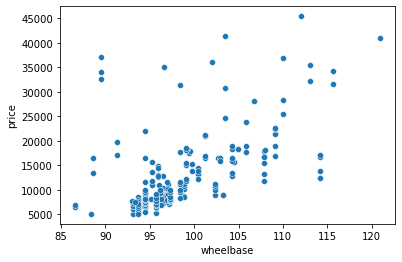

In [12]:
#Linearity and Normality
sns.scatterplot(x="wheelbase",y="price",data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

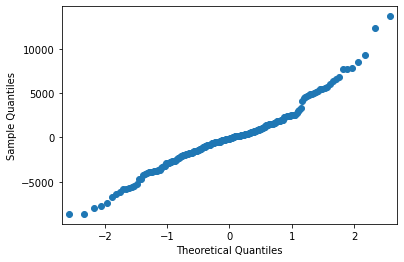

In [13]:
df,ax=plt.subplots(figsize=(6,4))
sm.qqplot(model.resid,ax=ax)
plt.show

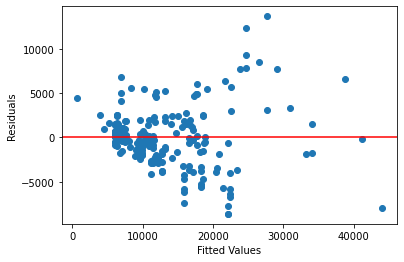

In [14]:
#Hetroscedasticity
df,ax=plt.subplots(figsize=(6,4))
ax.scatter(model.predict(),model.resid)
ax.axhline(y=0,color='red')
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

**Q3.**

In [17]:
from sklearn.preprocessing import LabelEncoder
df1= pd.read_csv(r"C:\Users\kaust\Desktop\Kaustubh\Notebook\adult.csv")
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
# Check for categorical columns
categorical_cols = df1.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [19]:
# Label encoding
le = LabelEncoder()
le_df = df1[categorical_cols].apply(le.fit_transform)

In [20]:
# Concatenate the transformed data
adult_transformed = pd.concat([df1.drop(categorical_cols, axis=1), le_df], axis=1)

In [21]:
# Check the transformed data
print(adult_transformed.head())

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass  education  marital-status  occupation  relationship  race  \
0          4          1               4           7             3     2   
1          4         11               2           5             0     4   
2          2          7               2          11             0     4   
3          4         15               2           7             0     2   
4          0         15               4           0             3     4   

   gender  native-country  income  
0       1              39       0  
1 

In [22]:
#Linear Regression
X=adult_transformed["age"]
Y=adult_transformed["income"]
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2737.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:23:11   Log-Likelihood:                -26368.
No. Observations:               48842   AIC:                         5.274e+04
Df Residuals:                   48840   BIC:                         5.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0377      0.006     -6.718      0.0

In [23]:
#Multiple Regression
X=adult_transformed[["age","educational-num","hours-per-week"]]
Y=adult_transformed["income"]
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3746.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:23:13   Log-Likelihood:                -22642.
No. Observations:               48842   AIC:                         4.529e+04
Df Residuals:                   48838   BIC:                         4.533e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7524      0.010    -

<AxesSubplot:xlabel='age', ylabel='income'>

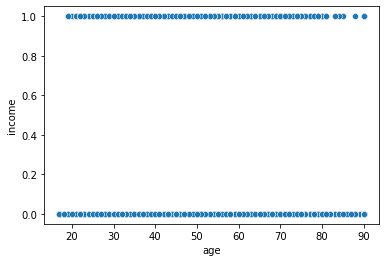

In [24]:
#Linearity and Normality
sns.scatterplot(x="age",y="income",data=adult_transformed)

<function matplotlib.pyplot.show(close=None, block=None)>

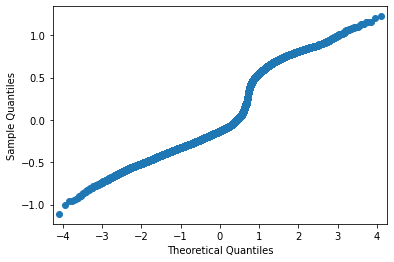

In [25]:
adult_transformed,ax=plt.subplots(figsize=(6,4))
sm.qqplot(model.resid,ax=ax)
plt.show

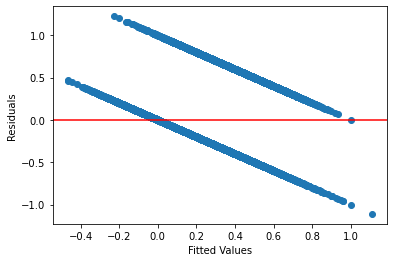

In [26]:
#Hetroscedasticity
adult_transformed,ax=plt.subplots(figsize=(6,4))
ax.scatter(model.predict(),model.resid)
ax.axhline(y=0,color='red')
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
plt.show()

RIDGE REGRESSION

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
iris=sns.load_dataset("iris")

In [30]:
#Overfitting
X_train,X_test,Y_train,Ytest=train_test_split(iris.petal_length,iris.sepal_length,test_size=0.2,random_state=20)
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=20)
tree.fit(X_train,Y_train)
Y_pred=tree.predict(X_test)
#for testing time
mse=mean_squared_error(Y_test,Y_pred)
print("MSE for testing:",mse)
#for training time
Y_pred_train=tree.predict(X_train)
mse_train=mean_squared_error(Y_train,Y_pred_train)
print("MSE for training:",mse_train)

ValueError: Expected 2D array, got 1D array instead:
array=[4.2 4.1 1.4 1.6 1.6 4.5 4.5 1.4 4.5 6.1 4.5 5.6 1.4 4.4 4.7 1.3 1.7 1.4
 5.  1.9 5.6 5.4 1.5 6.  4.  3.6 4.5 1.3 1.5 3.8 4.3 4.  3.9 4.7 4.6 4.2
 1.7 4.5 4.4 1.5 1.3 4.5 4.  4.6 1.5 1.5 5.3 1.3 1.6 3.5 4.8 5.1 4.9 5.6
 5.6 5.9 3.9 5.5 6.1 6.1 1.4 5.5 1.5 1.4 1.2 5.2 4.9 4.8 5.4 4.9 4.2 1.3
 4.9 1.4 3.3 6.7 1.9 4.5 4.7 4.8 1.4 1.6 6.  5.7 3.9 4.4 3.5 5.7 5.6 1.6
 5.7 1.4 5.  1.5 1.7 5.  5.6 6.3 1.5 1.5 5.1 5.1 4.2 6.4 1.6 5.1 1.4 1.5
 5.1 6.6 1.3 1.6 1.3 6.9 4.  1.  4.4 5.5 1.5 4.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
df2 = iris.reshape(-1, 1)

AttributeError: 'DataFrame' object has no attribute 'reshape'